<a href="https://colab.research.google.com/github/kenza-amira/Head_Motion_Classify/blob/main/BERT_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', palette="pastel")
plt.rc('font', family='serif')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# pip install scikit-surgerycore

  Created wheel for scikit-surgerycore: filename=scikit_surgerycore-0.6.10-py2.py3-none-any.whl size=23593 sha256=7d20b1c47ca9cac342ec9d7b9de128c95abde4b3f2903047aea8a8128aaba27a
  Stored in directory: /root/.cache/pip/wheels/86/96/6c/0127158f4d2a387d5a9d0351acca418cb27c68703a8f88c0b4
Successfully built scikit-surgerycore


In [6]:
from sksurgerycore.algorithms.averagequaternions import average_quaternions 
def avgQtn(quaternions, N=5):
    j = 0
    result = np.asarray([])
    while j <= len(quaternions) - N:
        to_avg = quaternions[j:(j+N)]
        avged = average_quaternions(to_avg)
        result = np.append(result, avged)
        j += N
    return np.reshape(result,(-1,4))

# If not running in Colab

In [ ]:
X = []
y = []

In [ ]:
path = r'C:\Users\kenza\OneDrive\Bureau\UG4_Code\Project_Data\Transcriptions_p'
transcriptions = [path + '\\' + r for r in os.listdir(path)]
all_t = []
for t in transcriptions:
    dirs = os.listdir(t)
    for d in dirs:
        all_t.append(t + "\\"+ d)

In [ ]:
path = r'C:\Users\kenza\OneDrive\Bureau\UG4_Code\qtn_cleaned'
qtns = [path + '\\' + r for r in os.listdir(path)]
all_q = []
for t in qtns:
    dirs = os.listdir(t)
    for d in dirs:
        all_q.append(t + "\\"+ d)

In [ ]:
print(len(all_q), len(all_t))
pairs = zip(all_t, all_q)

117 117


In [ ]:
no_words = 10
for a,b in pairs:
    print(a, b)
    if 'Soph_02' in a or 'Dani_03' in a:
        continue
    word_file = open(a)
    qn_file = open(b)
    i = 0
    indices = [0]
    lines = word_file.readlines()
    while(i+no_words <= len(lines)):
        sentence = []
        sequence = 0
        begin = 0
        end = 0
        for j in range(i, i+no_words):
            splitted = lines[j].split()
            word = splitted[3]
            if j == i:
                begin = int(splitted[4])
            elif j == i+ no_words -1:
                end = int(splitted[5])
            sentence.append(word)
        indices.append(indices[-1] + end - begin)
        X.append(" ".join(sentence))
        i += no_words

    lines = [np.array(line.strip().split(), dtype = float) for line in qn_file.readlines()]
    for i in range(1, len(indices)):
        to_avg = lines[indices[i-1]:indices[i]]
        to_avg = np.array(to_avg)
        y.append(avgQtn(to_avg[:,:4], N=len(to_avg)).flatten())
        

C:\Users\kenza\OneDrive\Bureau\UG4_Code\Project_Data\Transcriptions_p\Adam\Adam_01_n C:\Users\kenza\OneDrive\Bureau\UG4_Code\qtn_cleaned\Adam\Adam_01_n.qtn
C:\Users\kenza\OneDrive\Bureau\UG4_Code\Project_Data\Transcriptions_p\Adam\Adam_02_e C:\Users\kenza\OneDrive\Bureau\UG4_Code\qtn_cleaned\Adam\Adam_02_e.qtn
C:\Users\kenza\OneDrive\Bureau\UG4_Code\Project_Data\Transcriptions_p\Adam\Adam_03_i C:\Users\kenza\OneDrive\Bureau\UG4_Code\qtn_cleaned\Adam\Adam_03_i.qtn
C:\Users\kenza\OneDrive\Bureau\UG4_Code\Project_Data\Transcriptions_p\Adam\Adam_04_e C:\Users\kenza\OneDrive\Bureau\UG4_Code\qtn_cleaned\Adam\Adam_04_e.qtn
C:\Users\kenza\OneDrive\Bureau\UG4_Code\Project_Data\Transcriptions_p\Adam\Adam_05_i C:\Users\kenza\OneDrive\Bureau\UG4_Code\qtn_cleaned\Adam\Adam_05_i.qtn
C:\Users\kenza\OneDrive\Bureau\UG4_Code\Project_Data\Transcriptions_p\Adam\Adam_06_n C:\Users\kenza\OneDrive\Bureau\UG4_Code\qtn_cleaned\Adam\Adam_06_n.qtn
C:\Users\kenza\OneDrive\Bureau\UG4_Code\Project_Data\Transcripti

In [ ]:
np.array(y).shape, np.array(X).shape

((6341, 4), (6341,))

In [ ]:
np.savez("exp2_data", np.array(X), np.array(y))

# If Running on Colab

In [11]:
arr = np.load('/content/drive/MyDrive/Colab Notebooks/exp2_data.npz')
X = arr["arr_0"]
y = arr["arr_1"]
X.shape, y.shape

((6341,), (6341, 4))

# Start Clustering


In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=20, random_state=0, verbose=1)
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 15673.271283037495.
Iteration 1, inertia 5969.278624238448.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 15742.236133869315.
Iteration 1, inertia 5969.278624238447.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9622.68884807206.
Iteration 1, inertia 5969.278624238447.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9619.969415740363.
Iteration 1, inertia 5969.278624238447.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9616.462648491633.
Iteration 1, inertia 5969.278624238448.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9613.980001642502.
Iteration 1, inertia 5969.278624238447.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9750.14390576796.
Iteration 1, inertia 5969.2786242384

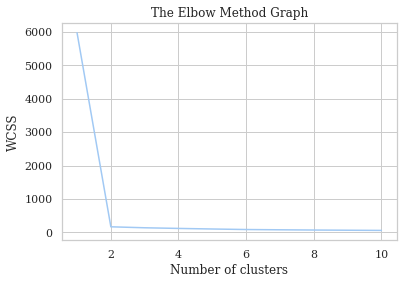

In [13]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(y)

In [15]:
cluster_no = 2

# Start Classifying

In [16]:
d = {'text': X, 'type': y_kmeans}
df = pd.DataFrame(d)

In [17]:
df

,text,type
0,YEAH IT IS BRIAN RIGHT COOL I UM I ACT,0
1,WITH BEDLAM THEATRE SO THE ONE ROUND THE CORNE...,1
2,WHERE LIKE HALF THE GUYS I THINK WHO ARE DOING,1
3,THIS PROJECT ARE FROM BUT UM YEAH NO IT'S GOOD,1
4,FUN SO I'M NOT A STUDENT SO I WORK AT,0
...,...,...
6336,THE THE CAULIFLOWER CHEESE LOOKS GOOD UM M- MA...,1
6337,FOR THAT HOW ABOUT YOU HO- HOW ABOUT YOU WHA-,1
6338,WHAT YOU HAVING YEAH THAT SOUNDS GOOD LIKE BRO...,1
6339,D- DO THEY DO THEY NUMBER THEM I DIDN'T NOTICE,0


In [19]:
# pip install transformers

     |████████████████████████████████| 3.8 MB 4.2 MB/s 
     |████████████████████████████████| 6.5 MB 67.5 MB/s 
     |████████████████████████████████| 596 kB 69.5 MB/s 
     |████████████████████████████████| 895 kB 84.0 MB/s 
     |████████████████████████████████| 67 kB 6.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [21]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [22]:
df['type'].value_counts()

1    3943
0    2398
Name: type, dtype: int64

In [23]:
df['type'].unique()

array([0, 1], dtype=int32)

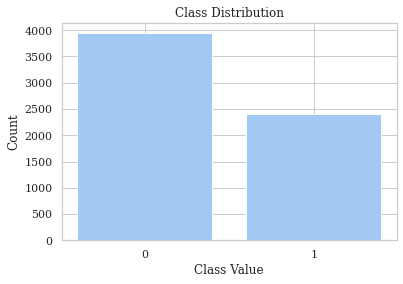

In [24]:
plt.bar(df['type'].unique(), df['type'].value_counts())
plt.xlabel("Class Value")
plt.xticks(df['type'].unique())
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.type.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=df.type.values)

In [26]:
df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [27]:
df.groupby(['text', 'type', 'data_type']).count()

,,
text,type,data_type
-KAY SO WHAT YEAH SO WHAT DO YOU THINK YEAH,1,train
A A LOW BASEBALL CAP OR A OR UH ANYTHING,1,train
A BIG HANKERCHIEF UGH W- PFUH WELL YOU KNOW I,1,train
A BIG PHOTOGRAPH OF THAT ANYWAY THAT WAS GOOD OH,1,train
A BIT CLOSER AND UH THERE WAS LIKE SOME LITTLE,0,train
...,...,...
YOURS WHAT WERE YOU WHAT WERE YOU THINKING WHAT YOU'VE,1,train
YOURS YOUR UH MHM OH OH OH I I'M REALLY,0,train
YOURSELF OH GREAT FANTASTIC I MEAN A- I MEAN DO,1,train


In [28]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [30]:
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].type.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].type.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [31]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train.type(torch.LongTensor))

dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val.type(torch.LongTensor))

In [32]:
len(dataset_train), len(dataset_val)

(5389, 952)

In [33]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=cluster_no,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [34]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [35]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [36]:
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [37]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [38]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [40]:
def evaluate(dataloader_val):
    
    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [41]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1797 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.6718986165576599
Validation loss: 0.6651527273392527
F1 Score (Weighted): 0.4768581007532547


Epoch 2:   0%|          | 0/1797 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.6620666348957391
Validation loss: 0.6765263614789495
F1 Score (Weighted): 0.553781377747934


Epoch 3:   0%|          | 0/1797 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.5914431940567249
Validation loss: 0.8759538926793344
F1 Score (Weighted): 0.5520922912373326


Epoch 4:   0%|          | 0/1797 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.5299575878163405
Validation loss: 1.529280217319768
F1 Score (Weighted): 0.5589640263318788


Epoch 5:   0%|          | 0/1797 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.4418706925730073
Validation loss: 1.853626385071599
F1 Score (Weighted): 0.5679546328335255


In [44]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=cluster_no,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

model.load_state_dict(torch.load('finetuned_BERT_epoch_1.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Class: 0
Accuracy: 0/360

Class: 1
Accuracy: 592/592



In [46]:
model.load_state_dict(torch.load('finetuned_BERT_epoch_5.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

Class: 0
Accuracy: 137/360

Class: 1
Accuracy: 409/592

